<a href="https://colab.research.google.com/github/NihilisticMotif/CheCheConjecture/blob/main/ML_Stats/NormalDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get Data

In [ ]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy import integrate
import random

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive')

path='/content/drive/MyDrive/CheCheConjecture/ML_Stats/DataSet/K_RealEstate01_ArslanAli.csv'
'''
Source of the example data set: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset
'''
df = pd.read_csv(path)
df.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0.0,0.561,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.0,0.561,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0.0,0.561,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0.0,0.561,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


#Normal Distribution

###Standard Deviation

**What is Standard Deviation?**

* A standard deviation (or σ) = a measure of how dispersed the data is in relation to the mean.
* Low standard deviation = data are clustered around the mean
* High standard deviation = data are more spread out.

(https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod8_sd.html)

**Standard Deviation Formula**

$s = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$

* $s=$ Standard Deviation $\geq0$
* $n=$ number of all data points.
* $\overline{x}=\sum_{i=1}^n\frac{x_i}{n}$

**The Difference Between Variance And Standard Deviation**
* Variance = $\text{Standard Deviation}^2=s^2$
* reference: https://byjus.com/maths/difference-between-variance-and-standard-deviation/

**The Difference Between Population and sample standard deviation**
* If the data is being considered a population on its own $\implies s = \text{Population standard deviation} = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}}$
* If the data is a sample from a larger population, $\implies s = \text{Sample standard deviation} = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$
* reference: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

**Question: Why using $n-1$ instead of $n$ for calculating Sample Standard Deviation?**

Answer: The variable $n$ of sample is less than $n$ of Population. Thus when using the same equation, the Standard Deviation of sample also less than the Standard Deviation of population.

Using $n-1$ give a result a little bit bigger than using $n$, thus $n-1$ is used in order to approximate the Standard Deviation of sample.

Also, the $n-1$ is used instead of $n-r$ because $n-1$ usually give result better than other number.

reference: https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation

In [ ]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

name=df.columns[1]

print('s = '+str(StandardDeviation(df[name])))

s = 23.21209257197624


###Probability Distribution Function

**The relationship between Standard Deviation and bell curve (Probability Distribution Function)**

$P(x)=\frac{\exp{((-\frac{1}{2})*(\frac{x-\overline{x}}{s})^2)}}{s\sqrt{2\pi}}=\frac{1}{s\sqrt{2\pi}}*e^{(-\frac{1}{2})*(\frac{x-\overline{x}}{s})^2}$

* $s=$ Standard Deviation $\geq0$
* $n=$ number of all data points.
* $\overline{x}=\sum_{i=1}^n\frac{x_i}{n}$

**Properties of Probability Distribution Function**
* $P(x)\in(0,\infty]$
* domain of $P(x)=x\in[-\infty,\infty]$
* the total area under the curves of $P(x)=1$

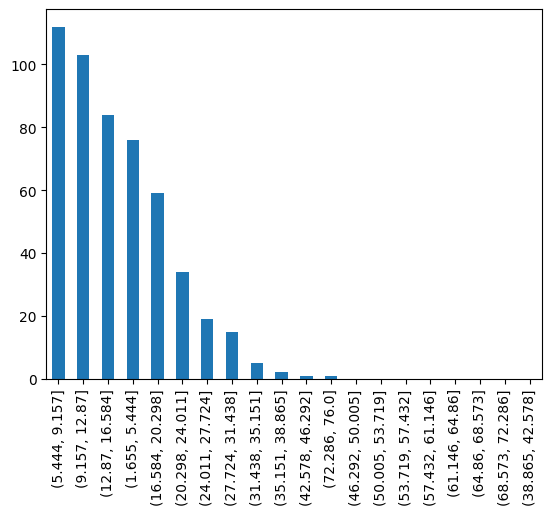

(5.444, 9.157]      112
(9.157, 12.87]      103
(12.87, 16.584]      84
(1.655, 5.444]       76
(16.584, 20.298]     59
(20.298, 24.011]     34
(24.011, 27.724]     19
(27.724, 31.438]     15
(31.438, 35.151]      5
(35.151, 38.865]      2
(42.578, 46.292]      1
(72.286, 76.0]        1
(46.292, 50.005]      0
(50.005, 53.719]      0
(53.719, 57.432]      0
(57.432, 61.146]      0
(61.146, 64.86]       0
(64.86, 68.573]       0
(68.573, 72.286]      0
(38.865, 42.578]      0
Name: LSTAT, dtype: int64


In [ ]:
# This code count the frequency of value
# x axis = value (value of the data)
# y axis = fequency (how often the data have the same value)

space=20
name=df.columns[-2]
df[name].value_counts(bins=space)

fig, ax = plt.subplots()
df[name].value_counts(bins=space).plot(ax=ax, kind='bar')
plt.show()
dflist=df[name].value_counts(bins=space)#.index#.tolist()
print((dflist))#.left))

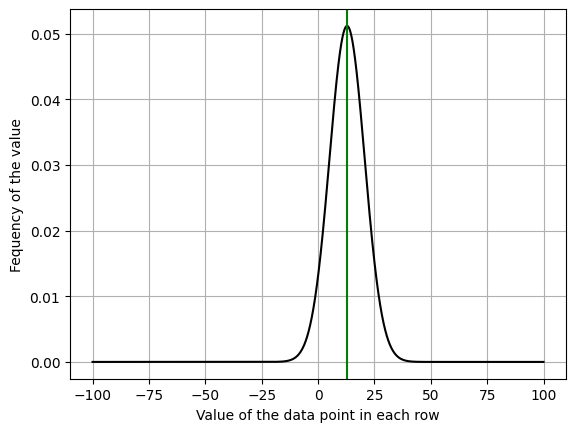

In [ ]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/StandardDeviation(Data),2)))/(math.sqrt(np.pi*2)*StandardDeviation(Data))
  return [XLine,YLine]

fx=BellCurve(df[name])

plt.plot(fx[0],fx[1],color='black')
#plt.axvline(df[name].mean()-0.675*StandardDeviation(df[name]),color='red') # reference: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
plt.axvline(df[name].mean(),color='green')
#plt.axvline(df[name].mean()+0.675*StandardDeviation(df[name]),color='blue') # reference: https://www.statology.org/find-quartiles-with-mean-standard-deviation/
plt.xlabel("Value of the data point in each row")
plt.ylabel("Fequency of the value")
plt.grid()
plt.show()

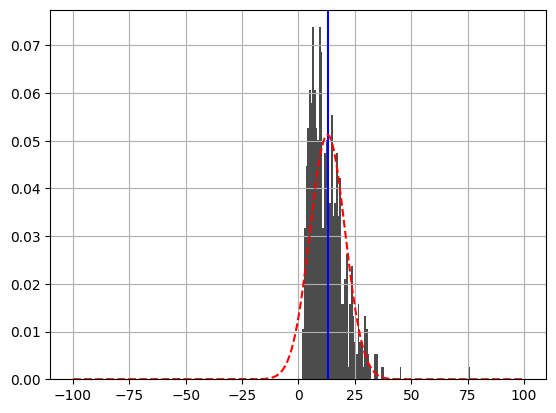

In [ ]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/StandardDeviation(Data),2)))/(math.sqrt(np.pi*2)*StandardDeviation(Data))
  return [XLine,YLine]

fx=BellCurve(df[name])
fig, ax = plt.subplots()
space=10

bins = 100
n, bins, patches = ax.hist(
  df[name],        # This parameter are the sequence of data.
  bins,            # This parameter is an optional parameter and it contains the integer
  density = 1,     # This parameter is an optional parameter and it contains the boolean values.
                   # density = counts / (sum(counts) * np.diff(bins))
  color ='black',
  alpha = 0.7
  # reference: https://www.geeksforgeeks.org/matplotlib-axes-axes-hist-in-python/
  )

plt.axvline(df[name].mean(),color='blue')
ax.plot(fx[0],fx[1], '--',color='red')
plt.grid()
plt.show()

**This is how `density=1` works in ax.hist**

Histogram Graph = $f(x)=h_x$
* $h_x=$ height of the histogram in the respect of input $x$
* $w=$ width of the histogram
* Area under the histogram = $\Sigma_{i=1}^nh_iw$

When `density=0`
* Nothing is change.

When `density=1`
* `ax.hist` will modify $ = 1$ in order to make comparison between Normal distribution and $f(x)$ becomes easy.

In [ ]:
# This is how density=1 works in ax.hist
# density = BinHeight / (100 * NumberOfAllBin * BinWidth)
# \therefore density dx = (np.sum(density * BinWidth) == 1)
# reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

binn=100

Frequency=df[name].value_counts(bins=binn).tolist()
Start=list(df[name].value_counts(bins=binn).index.left)
End=list(df[name].value_counts(bins=binn).index.right)
NumberOfAllBin=df[name].shape[0]
BinWidth=((End[0]-Start[0])/binn)

df01 = pd.DataFrame({'density=0':[], 'density=1':[]})

for i in range(len(Frequency)):
  df01=df01.append(
      pd.DataFrame(
          {'density=0':[Frequency[i]],
           'density=1':[Frequency[i]/(100*NumberOfAllBin*BinWidth)]}),  # this column is approximately equal to n
           #   density = BinHeight / (100 * NumberOfAllBin * BinWidth)
           ignore_index = True)

print('df01')
print(df01)

'''
# In order to plot this graph properly, you must sort [Start,End] pair and re order Frequency in its correct order.
'''

df01
    density=0  density=1
0        28.0   0.073748
1        28.0   0.073748
2        26.0   0.068480
3        23.0   0.060578
4        23.0   0.060578
..        ...        ...
95        0.0   0.000000
96        0.0   0.000000
97        0.0   0.000000
98        0.0   0.000000
99        0.0   0.000000

[100 rows x 2 columns]


<ipython-input-10-7bce412b6190>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-10-7bce412b6190>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-10-7bce412b6190>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-10-7bce412b6190>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-10-7bce412b6190>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-10-7bce412b6190>:17: FutureWarning: The 

'\n# In order to plot this graph properly, you must sort [Start,End] pair and re order Frequency in its correct order.\n'

In [ ]:
print(n)

[0.01053964 0.03161891 0.04479346 0.05269819 0.06060291 0.05796801
 0.07377746 0.06060291 0.05269819 0.05006328 0.07377746 0.06850764
 0.03161891 0.04742837 0.05006328 0.05796801 0.03688873 0.0553331
 0.03425382 0.03688873 0.04742837 0.03425382 0.04215855 0.01580946
 0.01580946 0.02107927 0.02634909 0.00263491 0.01580946 0.02371418
 0.01317455 0.00790473 0.00526982 0.01580946 0.00790473 0.00790473
 0.00263491 0.01317455 0.01053964 0.00526982 0.00263491 0.
 0.         0.00526982 0.00526982 0.         0.         0.00263491
 0.00263491 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00263491 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 

**Why does increasing the standard deviation of a normal distribution result in a flatter curve?**
The total area under the curves of Probability Distribution Function has to be equal to 1. Standard deviation is a measure of expansion of possibility of $x$ values. The more Standard deviation, means there is more variety of $x$ values. Thus more values will be found farther away from the mean. This flattens the curve.

reference:
* https://www.quora.com/Why-does-increasing-the-standard-deviation-of-a-normal-distribution-result-in-a-flatter-curve
* https://qr.ae/prlYKv

###Z score

**What is Z score (a.k.a. The standard score)?**

$Z=\frac{x-\overline{x}}{s}$

* $Z=$ Z score
* $Z=0\implies$ the score is equal to the mean.
* $Z>0\implies$ the score is above the mean.
* $Z<0\implies$ the score indicating it is below the mean.
* $\overline{x}=$ mean value of $x$
* $s=$ Standard Deviation

reference:
* https://www.investopedia.com/terms/z/zscore.asp#toc-how-the-z-score-is-used
* https://statistics.laerd.com/statistical-guides/standard-score.php
* https://youtu.be/5S-Zfa-vOXs

###Percentile

**Definition**
* Percentile (n)= a value on a scale of 100 that indicates the percent of a distribution that is equal to or below it. (https://www.merriam-webster.com/dictionary/percentile)

**Formula**
* $\int_{-\infty}^{P_x}f(x)\,dx=$ area under the curve from point $-\infty$ to $P_x$
 * This integral also means $\%$ of the data that have value less than or equal to $P_x$

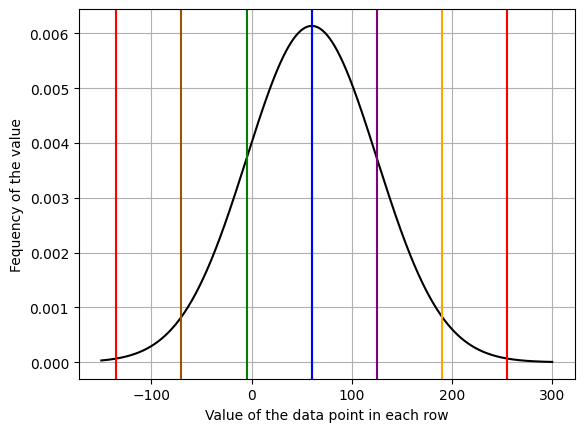

In [ ]:
Ms=60
SDs=65

def BellCurve(Ms=0,SDs=1, Domain=np.arange(-150,300,0.01)):
  XLine=Domain
  YLine=[]
  for i in XLine:
    YLine.append((pow(float(np.exp(1)),-(1/2)*pow((i-Ms)/SDs,2)))/(math.sqrt(np.pi*2)*SDs))
  YLine=np.array(YLine)
  return [XLine,YLine]

fx=BellCurve(Ms=Ms,SDs=SDs)
plt.plot(fx[0],fx[1],color='black')

colors=[
    'red',
    '#995500',
    'green',
    'green',
    'purple',
    'orange',
    'red'
]
for i in range(7):
  plt.axvline((i-3)*SDs+Ms,color=colors[i])

plt.axvline(Ms,color='blue')
plt.xlabel("Value of the data point in each row")
plt.ylabel("Fequency of the value")
plt.grid()
plt.show()

**Note:**

The area under graph outside red line ($-3s+\overline{x}$ and $3s+\overline{x}$) is very small, which means that, there are rarely a data point that have value below or above that interval. (https://en.wikipedia.org/wiki/Percentile)

In [ ]:
# Integral Normal Distribution function when set

LessScore = integrate.quad(
    lambda x: (np.exp(-(1/2)*pow((x-Ms)/SDs,2)))/(math.sqrt(np.pi*2)*SDs),
    -np.inf,
    3*SDs+Ms)

print('Percentile =',float(LessScore[0]*100))

# reference: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

Percentile = 99.865010196837


#Exercise

**Given that:**

* There were 50 students take the exam.
* Sarah scored 70.
* The means score was 60.
* Standard deviation is 15.
* The exercise is based on this website: https://statistics.laerd.com/statistical-guides/standard-score-2.php

###**Question No.1, How well Sarah perform in an exam compare to other students?**

In [ ]:
def ZScore(xs,ms,sds):
  Zs=(xs-ms)/sds
  return Zs

Ms=60
SDs=15
Sarah=70
SarahZ=ZScore(Sarah,Ms,SDs)

print('Delta =', Sarah-Ms)
print('Zscore =', ZScore(Sarah,Ms,SDs))

Delta = 10
Zscore = 0.6666666666666666


In [ ]:
# Integral Normal Distribution function when set

LessScore = integrate.quad(
    lambda x: (np.exp(-(1/2)*pow((x-Ms)/SDs,2)))/(math.sqrt(np.pi*2)*SDs),
    -np.inf,
    Sarah)

MoreScore = integrate.quad(
    lambda x: (np.exp(-(1/2)*pow((x-Ms)/SDs,2)))/(math.sqrt(np.pi*2)*SDs),
    Sarah,
    np.inf)

print('% of people who scored less than Sarah is',float(LessScore[0]))
print('% of people who scored greater than Sarah is',float(MoreScore[0]))

print()
print('Sarah score is',float(LessScore[0]*100),'percentile')

# reference: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

% of people who scored less than Sarah is 0.7475074624530773
% of people who scored greater than Sarah is 0.25249253754691475

Sarah score is 74.75074624530774 percentile


**Note**

In this website (https://statistics.laerd.com/statistical-guides/standard-score-2.php) use Z-table instead of integral.

This integral does not have an antiderivative in terms of elementary functions, therefore it is impossible to compute this integral exactly. The alternative way is to create a table that represents the value of each integrals with respect to each means and standard deviation.

However, the easier ways to do this is to create a table that represents the value of each integrals with respect to each first and second digits of z score.

Reference: https://math.stackexchange.com/questions/2643327/where-do-the-values-in-a-z-table-come-from

**The answer in website is $74.86$**

###**Question No.2, What was the lowest score of the students who came in the top 10% of the class?**

Given that:
* $\int_{-\infty}^{P_x}f(x)\,dx=$ area under the curve from point $-\infty$ to $P_x$
* We want to find $P_x$

In [ ]:
P_ans=(30,0)
X_ans=0
random=0
learning=1
Percentile=900

while int(1000*P_ans[0])!=Percentile:
  X_ans=learning*np.random.rand(1)[0]
  P_ans=integrate.quad(
      lambda x: (np.exp(-(1/2)*pow((x-Ms)/SDs,2)))/(math.sqrt(np.pi*2)*SDs),
      -np.inf,
      X_ans)
  if P_ans[0]<0.9:
    learning+=1
  else:
    learning-=1
  #print('Calculate =', P_ans)


print('Finish')
print('\nX input =',X_ans)
print('Percentile =',P_ans)
print()
print('Therefore the lowest score of students who came in the top 10% is greater than',X_ans)


Finish

X input = 79.28948631044877
Percentile = (0.9007724931429085, 1.41424928515942e-08)

Therefore the lowest score of students who came in the top 10% is greater than 79.28948631044877


**The answer in website is $79.23$**

###Question No.3, How well did Sarah perform in her Maths coursework compared to her English Literature coursework?

**Given that:**
* English Exam Means Score = 60
* English Exam Standard Deviation Score = 15
* English Exam Score of Sarah = 70
* Mathematics Exam Means Score = 68
* Mathematics Exam Standard Deviation Score = 6
* Mathematics Exam Score of Sarah = 72

In [ ]:
# Integral Normal Distribution function when set
Ms=60
SDs=15
Sarah=70

Engg = integrate.quad(
    lambda x: (np.exp(-(1/2)*pow((x-Ms)/SDs,2)))/(math.sqrt(np.pi*2)*SDs),
    -np.inf,
    Sarah)

Ms=68
SDs=6
Sarah=72
Matt = integrate.quad(
    lambda x: (np.exp(-(1/2)*pow((x-Ms)/SDs,2)))/(math.sqrt(np.pi*2)*SDs),
    -np.inf,
    Sarah)

print('English Percentile =',float(Engg[0]*100))
print('Math Percentile =',float(Matt[0]*100))

# reference: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

English Percentile = 74.75074624530774
Math Percentile = 74.75074624530771


**Note**
* Sarah performed both exam equally well.
* z score can be used for this comparison too.